In [ ]:
'''
【课程1.5】  帕累托分析

帕累托分析（贡献度分析） → 帕累托法则：20/80定律

“原因和结果、投入和产出、努力和报酬之间本来存在着无法解释的不平衡。一般来说，投入和努力可以分为两种不同的类型：
多数，它们只能造成少许的影响；少数，它们造成主要的、重大的影响。”
→ 一个公司，80%利润来自于20%的畅销产品，而其他80%的产品只产生了20%的利润

例如：
** 世界上大约80％的资源是由世界上15％的人口所耗尽的
** 世界财富的80％为25％的人所拥有；在一个国家的医疗体系中
** 20％的人口与20％的疾病，会消耗80％的医疗资源。

一个思路：通过二八原则，去寻找关键的那20%决定性因素！

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

A    4377.396859
B    4646.306400
C    5046.403470
D     999.850611
E    2408.016058
F    4318.273353
G    3893.589001
H    2486.025654
I    2176.618725
J    3589.327506
dtype: float64
------
超过80%累计占比的节点值索引为： H
超过80%累计占比的节点值索引位置为： 6
------
核心产品为：
C    5046.403470
B    4646.306400
A    4377.396859
F    4318.273353
G    3893.589001
J    3589.327506
H    2486.025654
dtype: float64


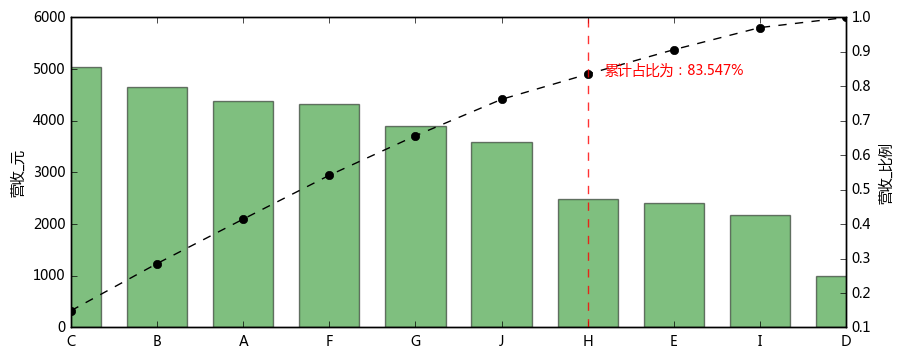

In [2]:
# 帕累托分布分析 

data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))
print(data)
print('------')
# 创建数据，10个品类产品的销售额

data.sort_values(ascending=False, inplace= True)
# 由大到小排列

plt.figure(figsize = (10,4))
data.plot(kind = 'bar', color = 'g', alpha = 0.5, width = 0.7)  
plt.ylabel('营收_元')
# 创建营收柱状图

p = data.cumsum()/data.sum()  # 创建累计占比，Series
key = p[p>0.8].index[0]  
key_num = data.index.tolist().index(key) 
print('超过80%累计占比的节点值索引为：' ,key)
print('超过80%累计占比的节点值索引位置为：' ,key_num)
print('------')
# 找到累计占比超过80%时候的index
# 找到key所对应的索引位置

p.plot(style = '--ko', secondary_y=True)  # secondary_y → y副坐标轴
plt.axvline(key_num,hold=None,color='r',linestyle="--",alpha=0.8)  
plt.text(key_num+0.2,p[key],'累计占比为：%.3f%%' % (p[key]*100), color = 'r')  # 累计占比超过80%的节点
plt.ylabel('营收_比例')
# 绘制营收累计占比曲线

key_product = data.loc[:key]
print('核心产品为：')
print(key_product)
# 输出决定性因素产品